# Table of Contents
## 1 Import Libraries 
## 2 Import data set 
## 3 Elbow Technique 
## 4 K-means clustering 
## 5 Descriptive Statistics

# 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os 
import sklearn 
from sklearn.cluster import KMeans 
import pylab as pl

# 2 Import data sets

In [4]:
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

#Data set 
ARWU = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'Pickle data sets','ARWU_rename_countries.pkl'))

In [5]:
#Check shape
ARWU.shape

(3014, 14)

In [6]:
#Check head
ARWU.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,country,region,Score Category
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,United States of America,North America,Over 65
1,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,2006,United States of America,North America,Over 65
2,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,2007,United States of America,North America,Over 65
3,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,2008,United States of America,North America,Over 65
4,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,2009,United States of America,North America,Over 65


In [7]:
#Check data types 
ARWU.dtypes

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
country             object
region              object
Score Category      object
dtype: object

In [8]:
#Create a subset to drop the categorical variables 
columns = ["alumni", "award", "hici", "ns", "pub", "pcp", "year"]

In [9]:
data = ARWU[columns]

In [10]:
data.head()

,alumni,award,hici,ns,pub,pcp,year
0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,100.0,100.0,100.0,100.0,100.0,73.6,2006
2,100.0,100.0,100.0,100.0,100.0,73.0,2007
3,100.0,100.0,100.0,100.0,100.0,74.1,2008
4,100.0,100.0,100.0,100.0,100.0,74.8,2009


In [11]:
data.describe()

,alumni,award,hici,ns,pub,pcp,year
count,3014.000000,3013.000000,3013.000000,3002.000000,3013.000000,3013.000000,3014.000000
mean,9.347147,7.789180,16.623697,16.357495,39.674013,21.597677,2009.725614
std,14.921380,16.862552,15.330460,13.206126,13.164778,9.861345,3.215054
min,0.000000,0.000000,0.000000,0.000000,14.700000,8.700000,2005.000000
25%,0.000000,0.000000,7.300000,8.000000,29.600000,15.800000,2007.000000
50%,0.000000,0.000000,12.600000,12.800000,37.100000,19.200000,2009.000000
75%,15.600000,11.200000,21.900000,20.400000,47.700000,24.800000,2012.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2015.000000


# 3 Elbow Technique

In [12]:
num_cl = range(1, 5) #potential number of clusters = 10
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
#Check how many NaN values exist 
data.isnull().sum()

alumni     0
award      1
hici       1
ns        12
pub        1
pcp        1
year       0
dtype: int64

In [15]:
#Look at the missing values 
ARWU_null = data[data['ns'].isnull()==True]
ARWU_null

,alumni,award,hici,ns,pub,pcp,year
1440,19.8,0.0,15.7,NaN,26.1,16.2,2005
1441,19.1,0.0,15.4,NaN,25.8,28.6,2006
1442,18.6,0.0,16.6,NaN,25.3,28.4,2007
1443,17.7,0.0,16.3,NaN,26.4,17.2,2008
1444,17.3,0.0,14.5,NaN,26.1,28.5,2009
1445,16.9,0.0,16.1,NaN,26.0,24.8,2010
1446,22.8,16.2,16.1,NaN,28.0,25.9,2011
1448,20.4,16.3,15.2,NaN,30.5,28.0,2014
1449,19.9,16.3,15.2,NaN,31.2,28.7,2015
1707,9.0,NaN,NaN,NaN,NaN,NaN,2012


In [16]:
#Impute the median into the null values for the ns variable 
#data['Bare Nuclei'] = data['Bare Nuclei'].fillna((data['Bare Nuclei'].median()))
#data_2 = data['ns'].fillna((data['ns'].median()))

In [17]:
#Impute the median into the missing values for the ns variable 
data['ns'].fillna(12.8, inplace=True)
data.isnull().sum()

C:\Users\ctede\AppData\Local\Temp\ipykernel_12184\360973692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ns'].fillna(12.8, inplace=True)


alumni    0
award     1
hici      1
ns        0
pub       1
pcp       1
year      0
dtype: int64

In [18]:
#Drop index 1707 because majority of the data is missing 
data = data.drop(1707)
data

,alumni,award,hici,ns,pub,pcp,year
0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,100.0,100.0,100.0,100.0,100.0,73.6,2006
2,100.0,100.0,100.0,100.0,100.0,73.0,2007
3,100.0,100.0,100.0,100.0,100.0,74.1,2008
4,100.0,100.0,100.0,100.0,100.0,74.8,2009
...,...,...,...,...,...,...,...
3009,0.0,0.0,0.0,0.0,36.0,32.2,2015
3010,0.0,0.0,0.0,3.3,34.6,18.5,2015
3011,15.4,0.0,3.6,0.0,29.1,15.3,2015
3012,0.0,0.0,7.2,4.2,31.7,17.5,2015


In [19]:
data.isnull().sum()

alumni    0
award     0
hici      0
ns        0
pub       0
pcp       0
year      0
dtype: int64

In [20]:
#Repeat elbow technique 
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

In [21]:
score

[-3604751.953780278,
 -1782170.6669621374,
 -1196555.9751832266,
 -1006227.4288927212]

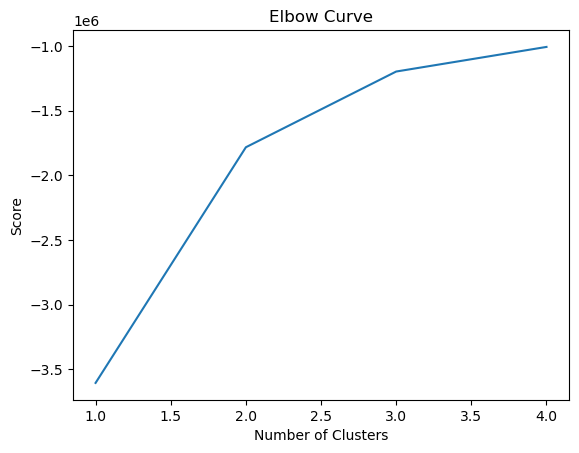

In [22]:
#Plot the elbow curve 
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I did 10 clusters first, then changed to 5, and re-plotted the elbow curve. Both times there was an elbow or flattening out after 3 clusters. So the number of clusters I will use for the algorithm is 3. 

# 4 K-means clustering

In [23]:
#Create the k-means object 
kmeans = KMeans(n_clusters = 3)

In [24]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [25]:
data['clusters'] = kmeans.fit_predict(data)

In [26]:
data.head()

,alumni,award,hici,ns,pub,pcp,year,clusters
0,100.0,100.0,100.0,100.0,100.0,72.4,2005,2
1,100.0,100.0,100.0,100.0,100.0,73.6,2006,2
2,100.0,100.0,100.0,100.0,100.0,73.0,2007,2
3,100.0,100.0,100.0,100.0,100.0,74.1,2008,2
4,100.0,100.0,100.0,100.0,100.0,74.8,2009,2


### Create visualizations (scatterplots)

Text(0, 0.5, 'Per Capita Performance')

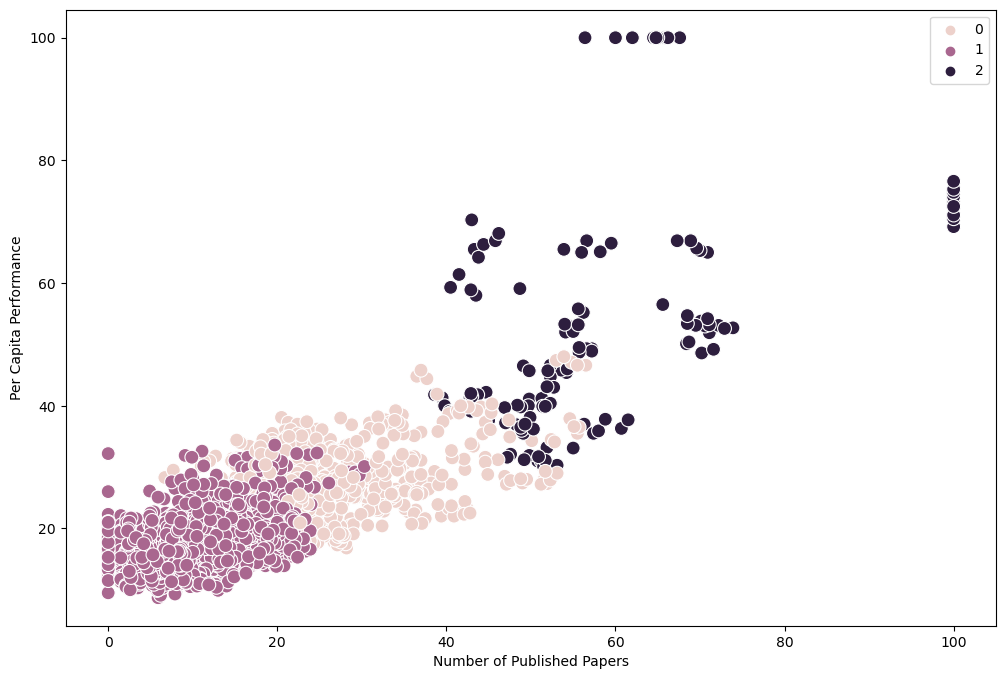

In [27]:
#Plot the pcp and ns variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['ns'], y=data['pcp'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Published Papers')
plt.ylabel('Per Capita Performance')

Majority of the data are in the medium purple and light pink clusters. 
- Medium purple: this data exists between a ~30 pcp value and ~30 number of published papers. There is a slight increasing trend and to the right. In this cluster, there is no obvious pattern or trend. For example, there are some universities with a low pcp and high ns value, OR there are universities that have both a high pcp value and a high ns value. Additionally there are universities that have a high pcp value and no published papers (an ns value of 0). 

- Light pink: this cluster appears to have a slight increasing trend (to the right) but a lot of the data points also appear to be floating horizontally. If this trend is more horizontal than linear, this means that the pcp value is not necessarily affected by the increasing or decreasing value of the number of published papers. 

- Dark purple: this cluster is the most sparse and spread out. In general there is an upward trend, but since the data is so spread out, I cannot definitively say that this is a correlated relationship. There are also outliers in this cluster. For example, there are universities with ~100 published papers and a high pcp value. And there are universities with a pvp value of ~100 and the number of published papers is also high ~60.

Text(0, 0.5, 'Per Capita Performance')

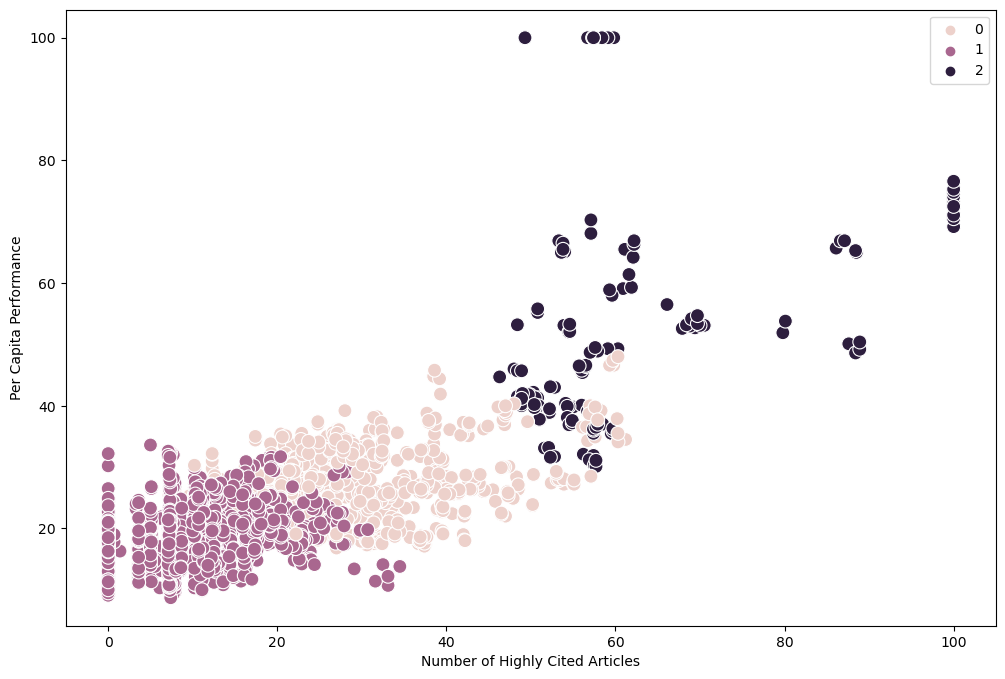

In [28]:
#Plot the pcp and hici variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['hici'], y=data['pcp'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Highly Cited Articles')
plt.ylabel('Per Capita Performance')

- Medium purple: in this cluster, there is no obvious relationship btwn the two variables. In other words, the number of highly cited articles does not cause the per capita performance to increase or decrease, bc there is no pattern or trend. 

- Light pink: the data points appear to stay in a horizontal direction, with a few data points following an increasing linear path. However, since majority of the cluster stays in a somewhat straight line, the conclusion is the same as the medium purple cluster. 

- Dark purple: these data points are very spread out and also lack a pattern/trend. 

Text(0, 0.5, 'Per Capita Performance')

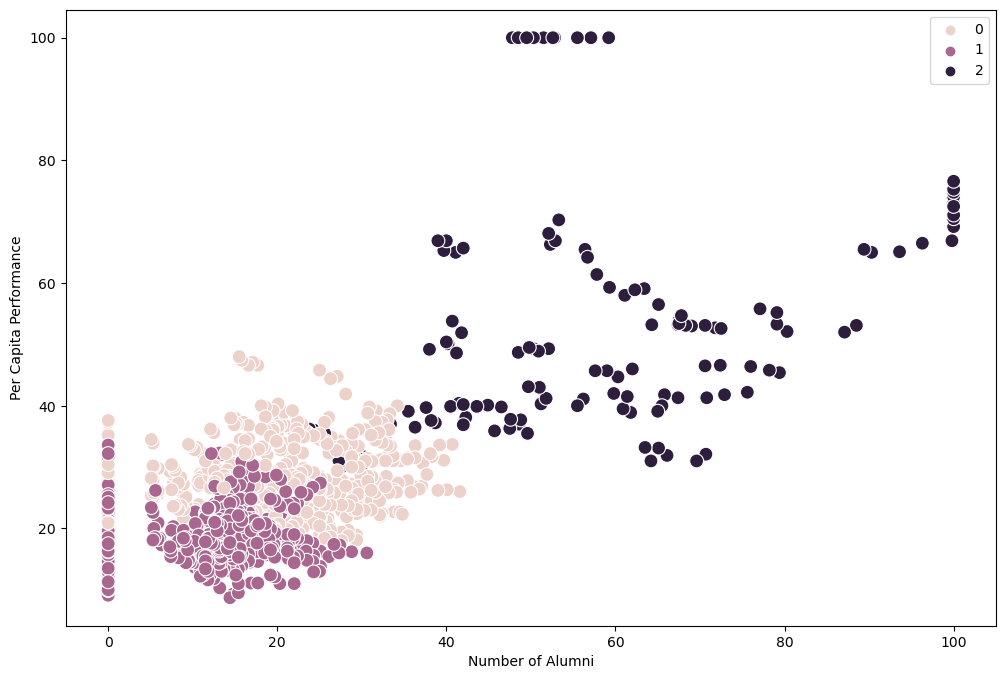

In [29]:
#Plot the pcp and alumni variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['alumni'], y=data['pcp'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Alumni')
plt.ylabel('Per Capita Performance')

The medium purple and light pink clusters appear to overlap. Similarly to the other variables (hici and ns), there does not seem to be an obvious pattern or trend (no increase or decrease). The data points cluster between a pcp value of ~50 and a number of alumni of ~40. Because there is no pattern or trend, I cannot definitively say that the number of alumni influences the per capita performance. If I had observed a positive linear trend, then I could say that as the number of alumni increase, the per capita performance increases. 

Text(0, 0.5, 'Per Capita Performance')

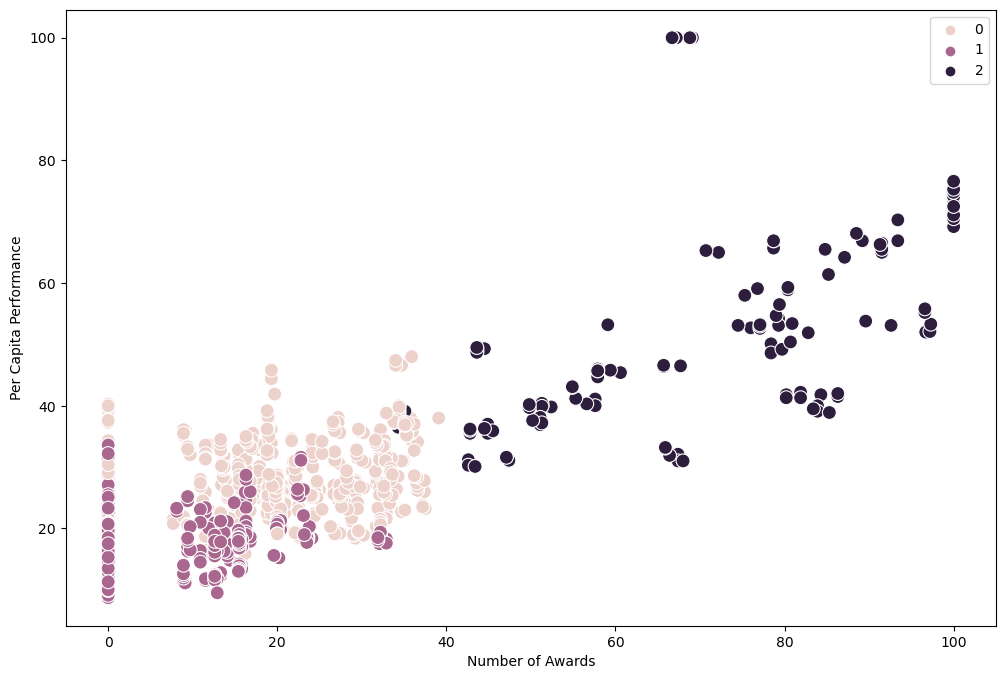

In [30]:
#Plot the pcp and award variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['award'], y=data['pcp'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Awards')
plt.ylabel('Per Capita Performance')

Overall (all data), there is a positive linear trend. The regression model had a large MSE value and was not the most accurate representation of the data (additionally, the R2 score was moderate (58%). In general, it appears that as the number of awards increases, the per capita performance will also increase. 

Text(0, 0.5, 'Per Capita Performance')

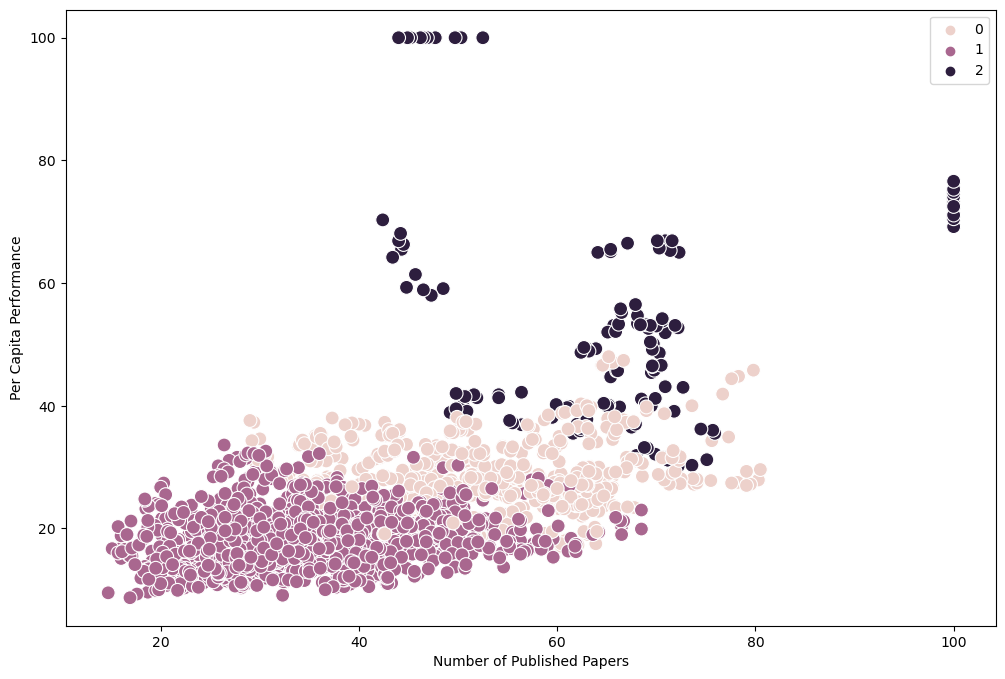

In [31]:
#Plot the pcp and pub variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['pub'], y=data['pcp'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Published Papers')
plt.ylabel('Per Capita Performance')

# 5 Descriptive Statistics 

In [32]:
#Create a cluster column for each of the colors
data.loc[data['clusters'] == 2, 'cluster'] = 'dark purple'
data.loc[data['clusters'] == 1, 'cluster'] = 'medium purple'
data.loc[data['clusters'] == 0, 'cluster'] = 'light pink'

In [33]:
#Descriptive stats 
data.groupby('cluster').agg({'pcp':['count','mean', 'median','max'], 
                          'alumni':['mean', 'median'],
                          'award':['mean', 'median'], 
                          'hici':['mean','median'],
                          'ns':['mean','median'],
                          'pub':['mean','median'],})

pcp                              alumni             award  \
              count       mean median    max       mean median       mean   
cluster                                                                     
dark purple     132  53.638636   49.3  100.0  59.562121   56.9  70.437121   
light pink      789  26.800507   26.4   48.0  16.640051   16.9  14.557921   
medium purple  2092  17.613719   17.2   33.6   3.428346    0.0   1.283413   

                           hici                ns               pub         
              median       mean median       mean median       mean median  
cluster                                                                     
dark purple     69.1  62.310606   57.2  58.582576  54.25  65.371970  66.35  
light pink      16.3  28.280228   27.0  25.452345  23.50  50.768948  50.50  
medium purple    0.0   9.344694    8.6  10.244359   9.70  33.868069  32.70

The mean of the pcp variable increases for each cluster as the mean for each of the other variables increases. Similarly, the median for each cluster also increases for each of the variables. The medium purple cluster contains majority of the data points (~69%). 

# Export ARWU with cluster column

In [30]:
data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ARWU_cluster.csv'))